In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import datetime as dt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from pytz import timezone

from pathlib import Path

In [2]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

In [3]:
import src.subsampling as ss

In [4]:
date = "20220826"
dates = ["20220826", "20220827", "20220828", "20220829"]
location = "Central Pond"

times = ["030000", "033000", "040000", "043000",
         "050000", "053000", "060000", "063000",
         "070000", "073000", "080000", "083000",
         "090000", "093000", "100000", "103000",
         "110000", "113000", "120000", "123000",
         "130000"]
presence_threshold = 1

labels = []
for f_date in dates:
    for time in times:
        labels.append(f'{f_date}_{time}.WAV')

datetime_hour_min_info = []
datetime_date_info = set()
for label in labels:
    date_and_time = dt.datetime.strptime(label, '%Y%m%d_%H%M%S.WAV')
    if (date_and_time.hour < 7):
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day - 1, 24 + date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    else:
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day, date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    datetime_hour_min_info.append(dt.datetime.strftime(date_and_time_PST, "%H:%M"))
    datetime_date_info.add(dt.datetime.strftime(date_and_time, "%b-%d"))

datetime_info = datetime_hour_min_info[:21]
date_info = sorted(list(datetime_date_info))
spaced_time_info = []
spaced_time_info.append(datetime_info[0])
for info in datetime_info[2::2]:
    spaced_time_info.append('')
    spaced_time_info.append(info)

spaced_time_info.append('')

presence1_over_days, lfpresence1_over_days, hfpresence1_over_days, numdets1_over_days, lfnumdets1_over_days, hfnumdets1_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 1)
presence2_over_days, lfpresence2_over_days, hfpresence2_over_days, numdets2_over_days, lfnumdets2_over_days, hfnumdets2_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 2)
c_presence_over_days, c_lfpresence_over_days, c_hfpresence_over_days, c_numdets_over_days, c_lfnumdets_over_days, c_hfnumdets_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 0)

presence1, lfpresence1, hfpresence1, num_dets1, num_lfdets1, num_hfdets1 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 1)
presence2, lfpresence2, hfpresence2, num_dets2, num_lfdets2, num_hfdets2 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 2)
c_presence, c_lfpresence, c_hfpresence, num_c_dets, num_c_lfdets, num_c_hfdets = ss.get_metrics_from_day(date, location, labels, presence_threshold, 0)

time_ticks = np.arange(c_presence_over_days.shape[1])[::2]
date_ticks = np.arange(c_presence_over_days.shape[0])

In [5]:
bar_alpha = 0.5
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
legend_loc = 1
bar_edgecolor = 'black'
bar_width = 0.5
plot_date = (dt.datetime.strptime(date, '%Y%m%d')).date()

In [6]:
plot_c_hf_dist = np.zeros(len(num_hfdets2))
plot_hf1_dist = np.zeros(len(num_hfdets2))
plot_hf2_dist = np.zeros(len(num_hfdets2))

plot_c_hf_dist[3] = num_c_hfdets[3]
plot_hf1_dist[3] = num_hfdets1[3]
plot_hf2_dist[3] = num_hfdets2[3]

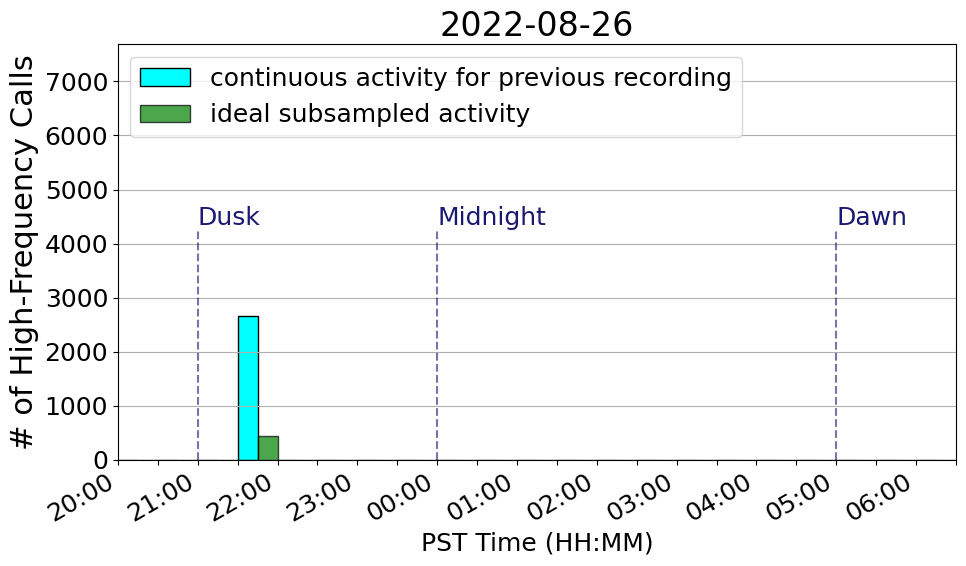

In [7]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})
plt.title(f"{plot_date}", fontsize=24)
plt.xlabel("PST Time (HH:MM)")
plt.bar(np.arange(0, len(spaced_time_info)-1)-0.25, height=plot_c_hf_dist, width=0.5, label="continuous activity for previous recording", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(np.arange(0, len(datetime_info))+0.25, height=plot_c_hf_dist/6, width=bar_width, label="ideal subsampled activity", color='green', alpha=0.7, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylabel("# of High-Frequency Calls", fontsize=22)
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(num_hfdets1), np.max(num_hfdets2)))
plt.legend(loc=2)
plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
plt.axvline(7.5, ymax=0.55, linestyle='dashed', label="Time of Midnight", color='midnightblue', alpha=0.6)
plt.axvline(17.5, ymax=0.55, linestyle='dashed', label="Time of Dawn", color='midnightblue', alpha=0.6)
plt.text(1.5, 4350, "Dusk", color='midnightblue')
plt.text(7.5, 4350, "Midnight", color='midnightblue')
plt.text(17.5, 4350, "Dawn", color='midnightblue')
plt.xticks(np.arange(len(spaced_time_info))-0.5, spaced_time_info)
plt.gcf().autofmt_xdate()
plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])

plt.tight_layout()
plt.show()

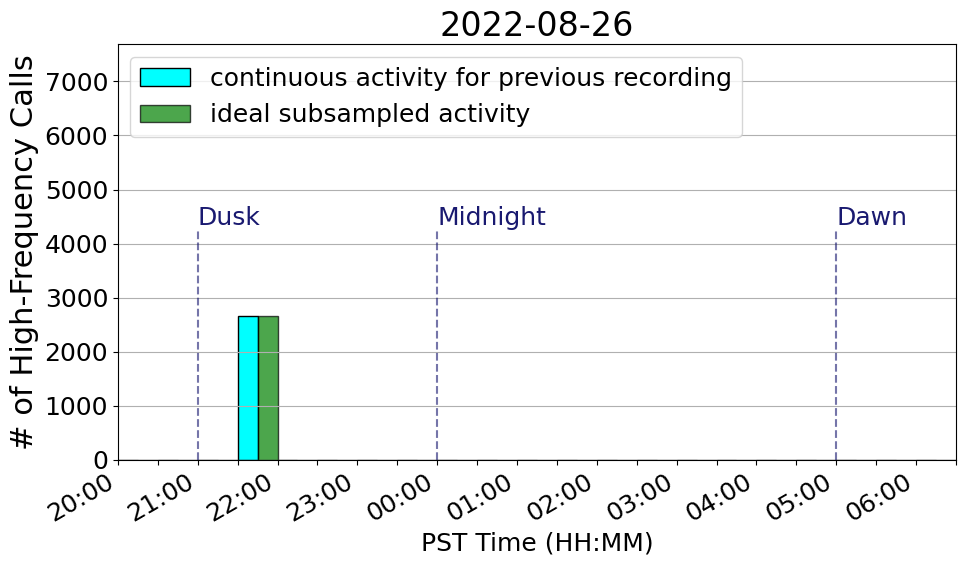

In [8]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})
plt.title(f"{plot_date}", fontsize=24)
plt.xlabel("PST Time (HH:MM)")
plt.bar(np.arange(0, len(spaced_time_info)-1)-0.25, height=plot_c_hf_dist, width=0.5, label="continuous activity for previous recording", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(np.arange(0, len(datetime_info))+0.25, height=plot_c_hf_dist, width=bar_width, label="ideal subsampled activity", color='green', alpha=0.7, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylabel("# of High-Frequency Calls", fontsize=22)
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(num_hfdets1), np.max(num_hfdets2)))
plt.legend(loc=2)
plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
plt.axvline(7.5, ymax=0.55, linestyle='dashed', label="Time of Midnight", color='midnightblue', alpha=0.6)
plt.axvline(17.5, ymax=0.55, linestyle='dashed', label="Time of Dawn", color='midnightblue', alpha=0.6)
plt.text(1.5, 4350, "Dusk", color='midnightblue')
plt.text(7.5, 4350, "Midnight", color='midnightblue')
plt.text(17.5, 4350, "Dawn", color='midnightblue')
plt.xticks(np.arange(len(spaced_time_info))-0.5, spaced_time_info)
plt.gcf().autofmt_xdate()
plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])

plt.tight_layout()
plt.show()

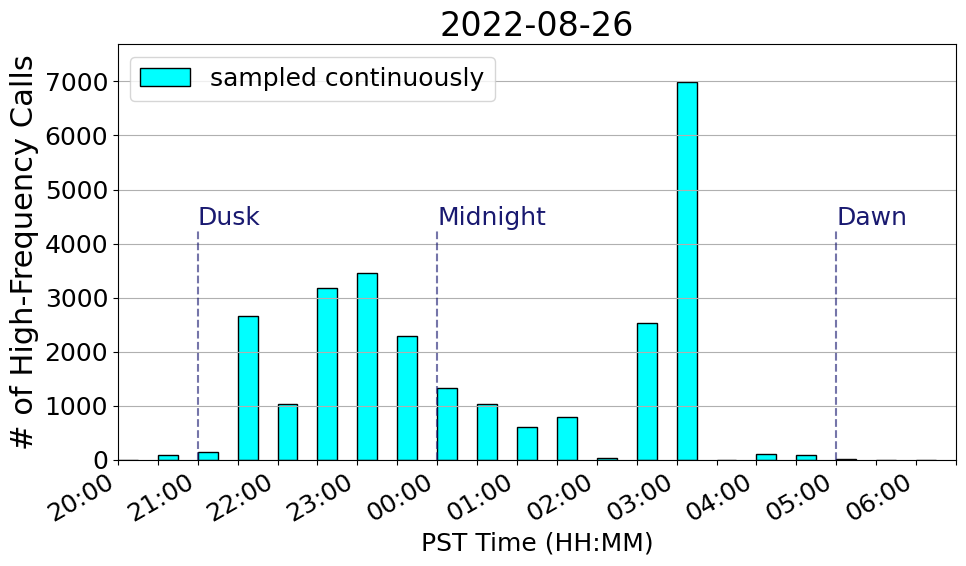

In [9]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})
plt.title(f"{plot_date}", fontsize=24)
plt.xlabel("PST Time (HH:MM)")
plt.bar(np.arange(0, len(datetime_info))-0.25, height=num_c_hfdets, width=bar_width, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylabel("# of High-Frequency Calls", fontsize=22)
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(num_hfdets1), np.max(num_hfdets2)))
plt.legend(loc=2)
plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
plt.axvline(7.5, ymax=0.55, linestyle='dashed', label="Time of Midnight", color='midnightblue', alpha=0.6)
plt.axvline(17.5, ymax=0.55, linestyle='dashed', label="Time of Dawn", color='midnightblue', alpha=0.6)
plt.text(1.5, 4350, "Dusk", color='midnightblue')
plt.text(7.5, 4350, "Midnight", color='midnightblue')
plt.text(17.5, 4350, "Dawn", color='midnightblue')
plt.xticks(np.arange(len(spaced_time_info))-0.5, spaced_time_info)
plt.gcf().autofmt_xdate()
plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])

plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/Research/Symposium/Figures/num_of_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

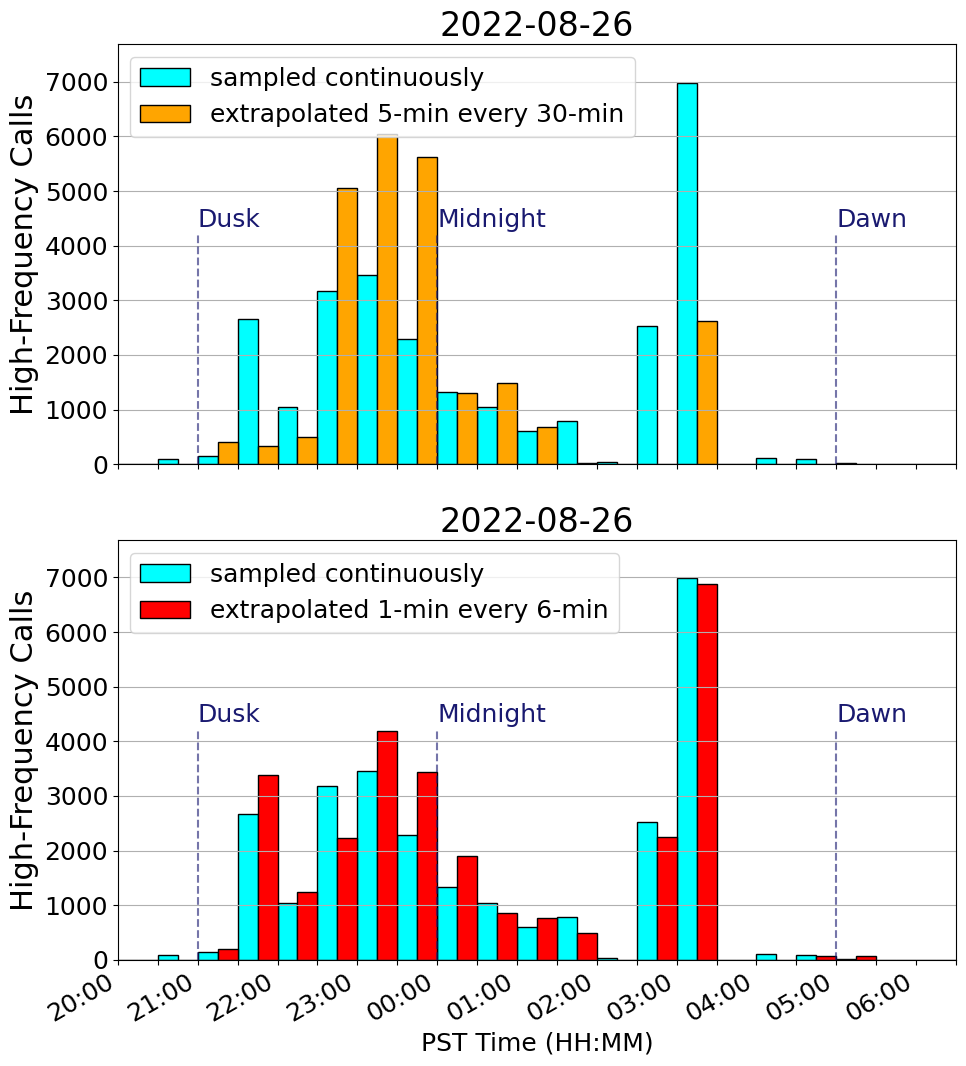

In [10]:
plt.figure(figsize=(10, 11))
plt.rcParams.update({'font.size': 18})
plt.subplot(211)
plt.title(f"{plot_date}", fontsize=24)
plt.xlabel("PST Time (HH:MM)")
plt.ylabel("High-Frequency Calls", fontsize=22)
plt.bar(np.arange(0, len(datetime_info))-0.25, height=num_c_hfdets, width=bar_width, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(np.arange(0, len(datetime_info))+0.25, height=num_hfdets2*6, width=bar_width, label="extrapolated 5-min every 30-min", color=comparison_30min_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=2)
plt.xticks(np.arange(len(spaced_time_info))-0.5, spaced_time_info)
plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
plt.axvline(7.5, ymax=0.55, linestyle='dashed', label="Time of Midnight", color='midnightblue', alpha=0.6)
plt.axvline(17.5, ymax=0.55, linestyle='dashed', label="Time of Dawn", color='midnightblue', alpha=0.6)
plt.text(1.5, 4350, "Dusk", color='midnightblue')
plt.text(7.5, 4350, "Midnight", color='midnightblue')
plt.text(17.5, 4350, "Dawn", color='midnightblue')
plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])

plt.subplot(212)
plt.title(f"{plot_date}", fontsize=24)
plt.xlabel("PST Time (HH:MM)")
plt.bar(np.arange(0, len(datetime_info))-0.25, height=num_c_hfdets, width=bar_width, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(np.arange(0, len(datetime_info))+0.25, height=num_hfdets1*6, width=bar_width, label="extrapolated 1-min every 6-min", color=comparison_6min_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylabel("High-Frequency Calls", fontsize=22)
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=2)
plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
plt.axvline(7.5, ymax=0.55, linestyle='dashed', label="Time of Midnight", color='midnightblue', alpha=0.6)
plt.axvline(17.5, ymax=0.55, linestyle='dashed', label="Time of Dawn", color='midnightblue', alpha=0.6)
plt.text(1.5, 4350, "Dusk", color='midnightblue')
plt.text(7.5, 4350, "Midnight", color='midnightblue')
plt.text(17.5, 4350, "Dawn", color='midnightblue')
plt.xticks(np.arange(len(spaced_time_info))-0.5, spaced_time_info)
plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/Research/Symposium/Figures/num_of_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

In [11]:
date = "20221017"
dates = ["20221014", "20221015", "20221016", "20221017"]
location = "Central Pond"

times = ["030000", "033000", "040000", "043000",
         "050000", "053000", "060000", "063000",
         "070000", "073000", "080000", "083000",
         "090000", "093000", "100000", "103000",
         "110000", "113000", "120000", "123000",
         "130000"]
presence_threshold = 1

labels = []
for f_date in dates:
    for time in times:
        labels.append(f'{f_date}_{time}.WAV')

datetime_hour_min_info = []
datetime_date_info = set()
for label in labels:
    date_and_time = dt.datetime.strptime(label, '%Y%m%d_%H%M%S.WAV')
    if (date_and_time.hour < 7):
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day - 1, 24 + date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    else:
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day, date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    datetime_hour_min_info.append(dt.datetime.strftime(date_and_time_PST, "%H:%M"))
    datetime_date_info.add(dt.datetime.strftime(date_and_time, "%b-%d"))

datetime_info = datetime_hour_min_info[:21]
date_info = sorted(list(datetime_date_info))
spaced_time_info = []
spaced_time_info.append(datetime_info[0])
for info in datetime_info[2::2]:
    spaced_time_info.append('')
    spaced_time_info.append(info)

spaced_time_info.append('')

presence1_over_days, lfpresence1_over_days, hfpresence1_over_days, numdets1_over_days, lfnumdets1_over_days, hfnumdets1_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 1)
presence2_over_days, lfpresence2_over_days, hfpresence2_over_days, numdets2_over_days, lfnumdets2_over_days, hfnumdets2_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 2)
c_presence_over_days, c_lfpresence_over_days, c_hfpresence_over_days, c_numdets_over_days, c_lfnumdets_over_days, c_hfnumdets_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 0)

presence1, lfpresence1, hfpresence1, num_dets1, num_lfdets1, num_hfdets1 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 1)
presence2, lfpresence2, hfpresence2, num_dets2, num_lfdets2, num_hfdets2 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 2)
c_presence, c_lfpresence, c_hfpresence, num_c_dets, num_c_lfdets, num_c_hfdets = ss.get_metrics_from_day(date, location, labels, presence_threshold, 0)

time_ticks = np.arange(c_presence_over_days.shape[1])[::2]
date_ticks = np.arange(c_presence_over_days.shape[0])

In [12]:
bar_alpha = 0.5
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
y_label_fontsize = 18
x_label_fontsize = 18
bar_edgecolor = 'black'
bar_width = 1

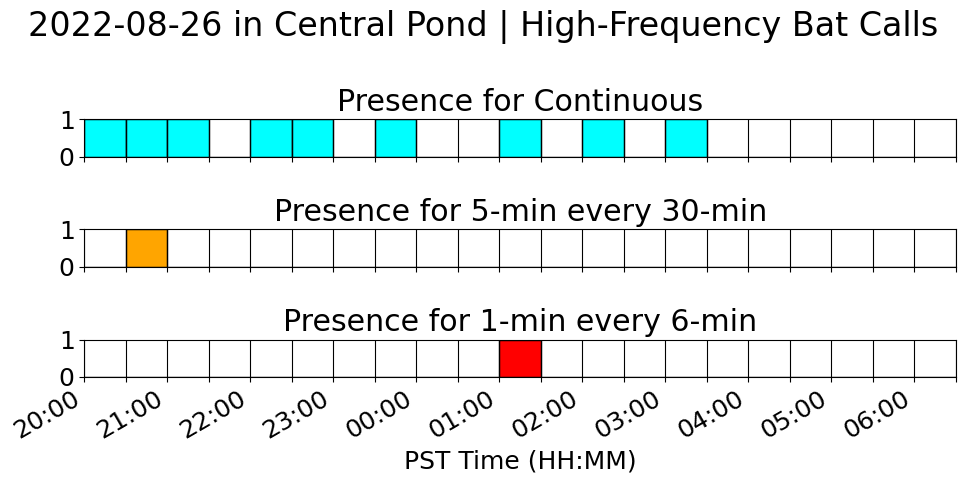

In [13]:
plt.figure(figsize=(10, 5))

plt.suptitle(f"{plot_date} in {location} | High-Frequency Bat Calls", fontsize=24)
plt.subplot(311)
plt.title(f"Presence for Continuous")
plt.bar(datetime_info, c_hfpresence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.xlabel("UTC Time (HH:MM)", fontsize=x_label_fontsize)
plt.yticks([0, 1], [0, 1])
plt.ylim(0, 1)
plt.xlim(0, 20.5)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.grid(axis="x", color='k')

plt.subplot(312)
plt.title(f"Presence for 5-min every 30-min")
plt.bar(datetime_info, hfpresence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor)
plt.xlabel("PST Time (HH:MM)", fontsize=x_label_fontsize)
plt.yticks([0, 1], [0, 1])
plt.ylim(0, 1)
plt.xlim(0, 20.5)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.grid(axis="x", color='k')

plt.subplot(313)
plt.title(f"Presence for 1-min every 6-min")
plt.bar(datetime_info, hfpresence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor)
plt.xlabel("PST Time (HH:MM)", fontsize=x_label_fontsize)
plt.yticks([0, 1], [0, 1])
plt.ylim(0, 1)
plt.xlim(0, 20.5)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.grid(axis="x", color='k')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/Research/Symposium/Figures/hf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

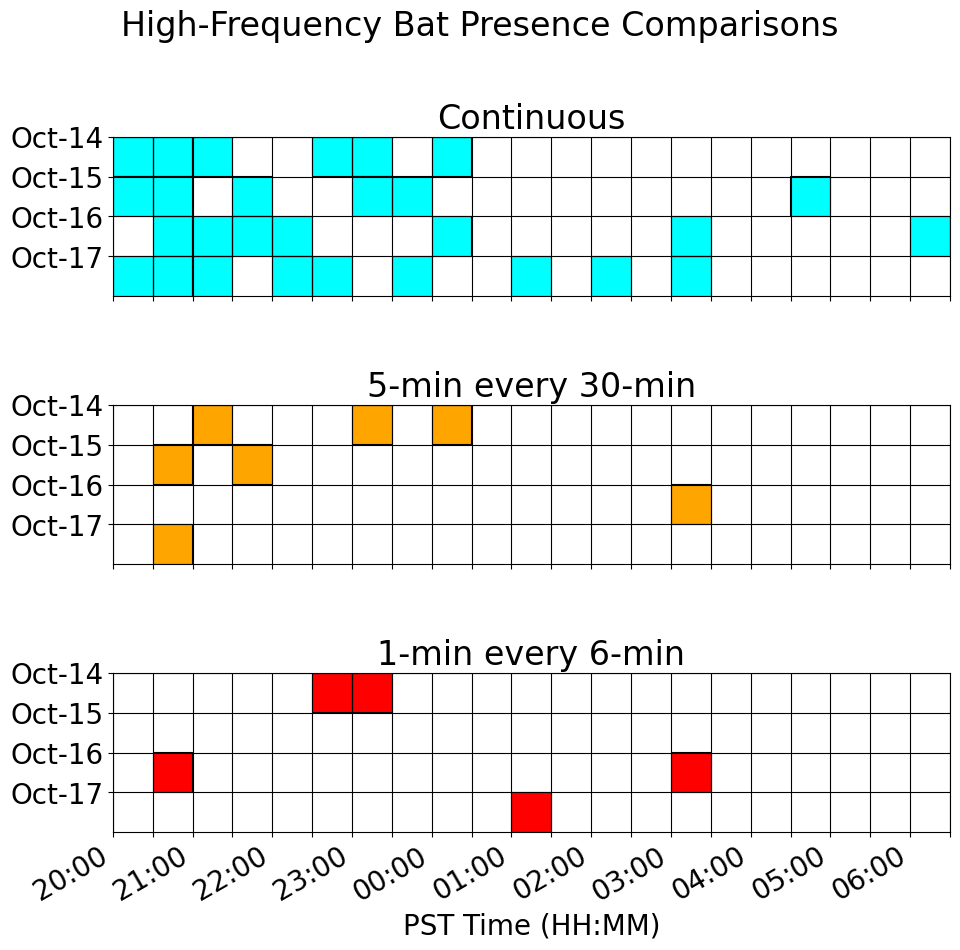

In [14]:
def rect(pos):
    r = plt.Rectangle(pos-0.505, 1, 1, facecolor="none", edgecolor="k", linewidth=0.8)
    plt.gca().add_patch(r)

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
plt.suptitle("High-Frequency Bat Presence Comparisons")

plt.subplot(311)
plt.title("Continuous")
plot_cp_overdays = c_hfpresence_over_days
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
    rect(pos)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.xlabel("PST Time (HH:MM)", fontsize=20)
plt.yticks(date_ticks-0.5, date_info)
plt.grid(which="both", color='k')

plt.subplot(312)
plt.title("5-min every 30-min")
plot_p2_overdays = hfpresence2_over_days
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.xlabel("PST Time (HH:MM)", fontsize=20)
plt.yticks(date_ticks-0.5, date_info)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.grid(which="both", color='k')

plt.subplot(313)
plt.title("1-min every 6-min")
plot_p1_overdays = hfpresence1_over_days
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.xticks(np.arange(c_presence_over_days.shape[1]+1)-0.5, spaced_time_info)
plt.xlabel("PST Time (HH:MM)", fontsize=20)
plt.yticks(date_ticks-0.5, date_info)
plt.grid(which="both", color='k')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig(f'{Path.home()}/Documents/Research/Symposium/Figures/hf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()